In [1]:
import pandas as pd

df = pd.read_csv('../data/raw/2021 SSBG Dashboard Data Export - 20231115.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710 entries, 0 to 1709
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     1710 non-null   int64 
 1   State Name               1710 non-null   object
 2   Line Num                 1710 non-null   int64 
 3   Service Category         1710 non-null   object
 4   SSBG Expenditures        652 non-null    object
 5   TANF Transfer Funds      311 non-null    object
 6   Total SSBG Expenditures  667 non-null    object
 7   Children                 439 non-null    object
 8   Adults 59 and Younger    336 non-null    object
 9   Adults 60 and Older      328 non-null    object
 10  Adults of Unknown Age    253 non-null    object
 11  Total Adults             346 non-null    object
 12  Total Recipients         575 non-null    object
dtypes: int64(2), object(11)
memory usage: 173.8+ KB


In [2]:
# convert string columns to ints, we know there are no floats
## clean col names
df.columns = ['year', 'state_name', 'serv_num', 'serv_cat', 
              'ssbg_exp', 'tanf_exp', 'total_ssbg_exp', 
              'children', 'adults59', 'adults60','adults_unknown_age', 'total_adults', 'total_recipients']

# NO FLOATS safe to remove all comas and dollar signs, then convert to int and fillna with 0
for col in df.columns[4:]:
    df[col] = df[col].str.replace(',','').str.replace('$','').fillna(0).astype(int)
df

,year,state_name,serv_num,serv_cat,ssbg_exp,tanf_exp,total_ssbg_exp,children,adults59,adults60,adults_unknown_age,total_adults,total_recipients
0,2021,Alabama,1,Adoption Services,0,0,0,0,0,0,0,0,0
1,2021,Alabama,2,Case Management,0,0,0,0,0,0,0,0,0
2,2021,Alabama,3,Congregate Meals,0,0,0,0,0,0,0,0,0
3,2021,Alabama,4,Counseling Services,0,0,0,0,0,0,0,0,0
4,2021,Alabama,5,Day Care - Adults,1930952,0,1930952,0,0,0,258,258,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,2021,Wyoming,26,Special Services - Youth at Risk,138652,0,138652,2288,0,0,0,0,2288
1706,2021,Wyoming,27,Substance Abuse Services,18545,0,18545,79,0,0,0,0,79
1707,2021,Wyoming,28,Transportation,4985,0,4985,141,0,0,0,0,141
1708,2021,Wyoming,29,Other Services,401252,0,401252,463,0,0,0,0,463


<Axes: xlabel='state_name'>

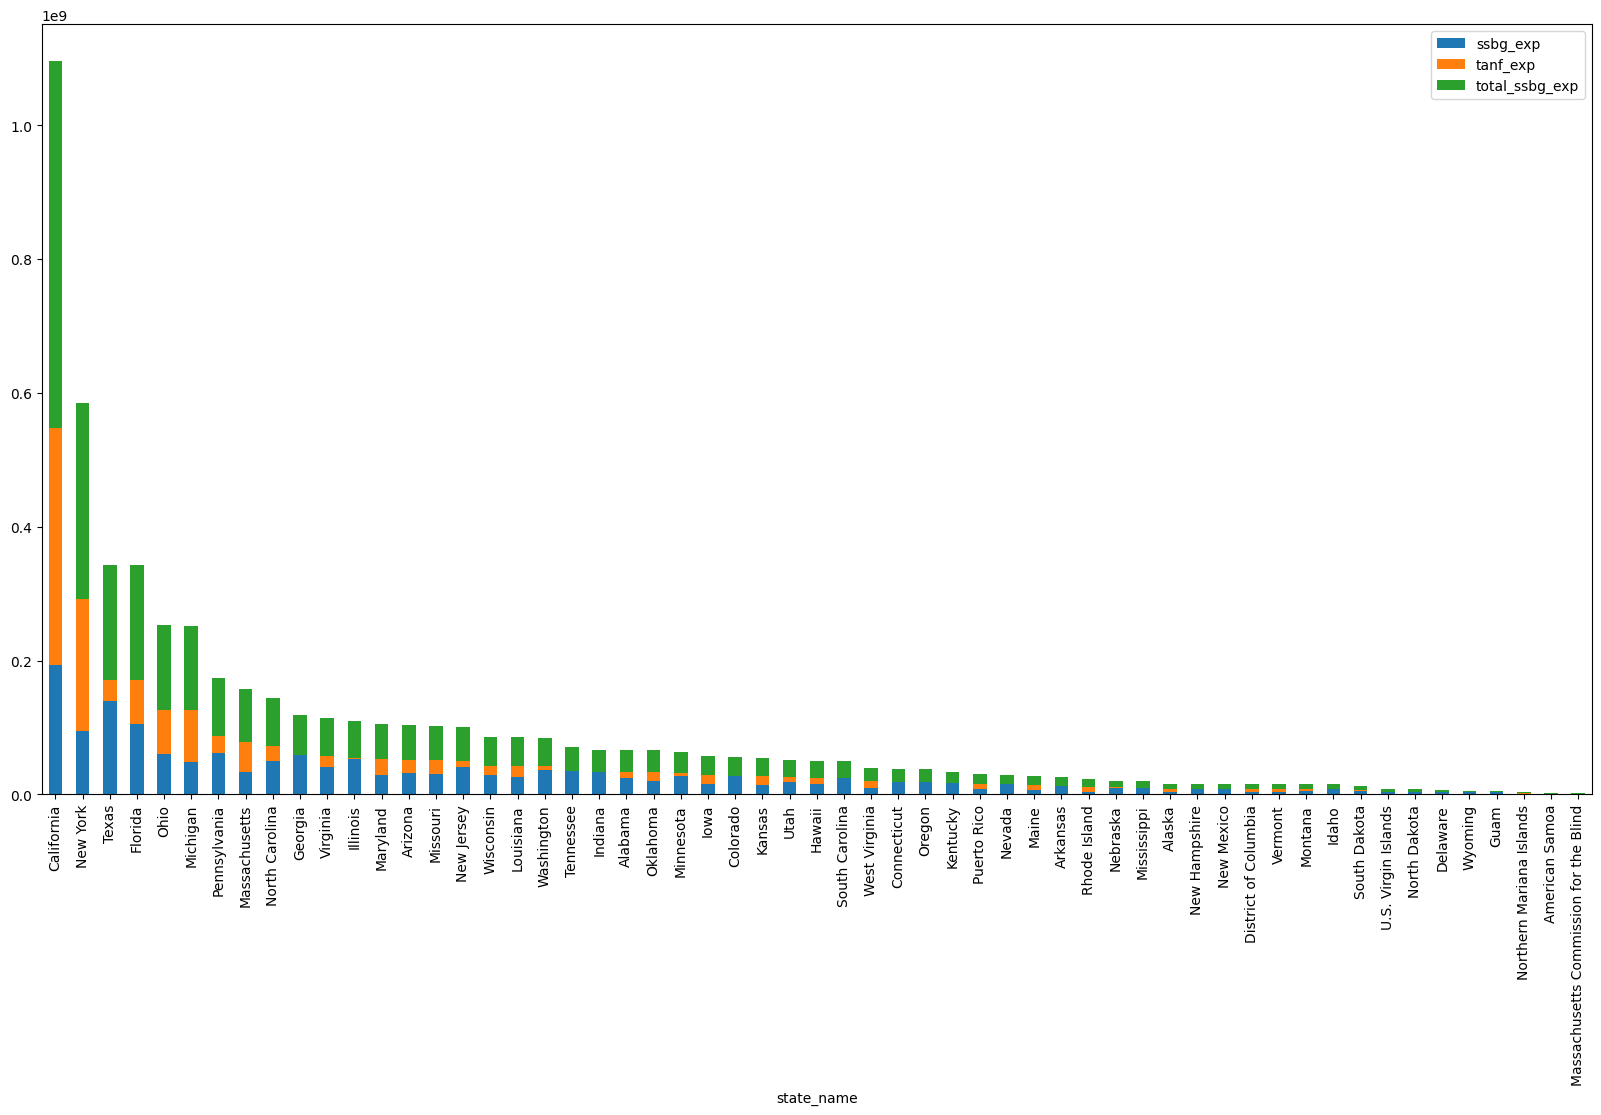

In [26]:
# Stacked bar chart with states combined ssbg_exp and tanf_exp as the staked items
# sort df by columns total_ssbg_exp

df[['state_name', 'ssbg_exp', 'tanf_exp', 'total_ssbg_exp']].groupby('state_name').sum().sort_values('total_ssbg_exp', ascending=False).plot(kind='bar', stacked=True, figsize=(20,10), )


